In [9]:
import os
import torch
from torch.optim import Adam
from torchvision import datasets, transforms
from network import Autoencoder, Conv_Autoencoder, add_white_noise
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cpu


# Task 1

Epoch [1/50], Training Loss: 0.1786
Epoch [2/50], Training Loss: 0.1148
Epoch [3/50], Training Loss: 0.1048
Epoch [4/50], Training Loss: 0.0996
Epoch [5/50], Training Loss: 0.0930
Epoch [6/50], Training Loss: 0.0896
Epoch [7/50], Training Loss: 0.0863
Epoch [8/50], Training Loss: 0.0849
Epoch [9/50], Training Loss: 0.0833
Epoch [10/50], Training Loss: 0.0805
Epoch [10/50], Test Loss: 0.0792


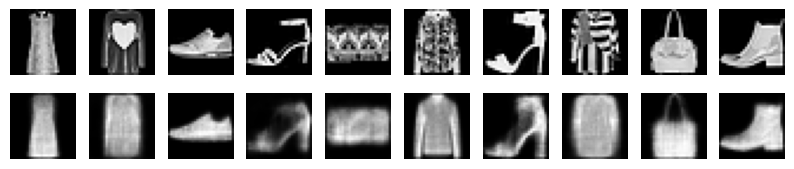

Epoch [11/50], Training Loss: 0.0778
Epoch [12/50], Training Loss: 0.0763
Epoch [13/50], Training Loss: 0.0753


KeyboardInterrupt: 

In [8]:

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
#Fashion MNIST image has form 1x1x28x28 (grayscale)

autoencoder = Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50

# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the images
        img.to(device)
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data in test_loader:
                img, _ = data
                img = img.view(img.size(0), -1)  # Flatten the images
                img.to(device)
                output = autoencoder(img)
                loss = criterion(output, img)
                test_loss += loss.item()

        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

        img = img.detach().cpu().numpy()
        output = output.detach().cpu().numpy()
        fig, axes = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(10):
            # Plot original images
            ax = axes[0, i]
            ax.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                    ax.set_title('Original')
                
            # Plot reconstructed images
            ax = axes[1, i]
            ax.imshow(output[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Reconstructed')
        plt.show()


# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()        

# Task 2

In [ ]:
train_losses = []
test_losses = []
# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img = img.view(img.size(0), -1)  # Flatten the images
        noisy_img = add_white_noise(img)       # Add noise to the images
        noisy_img.to(device)
        output = autoencoder(noisy_img)
        loss = criterion(output, img)    # Compute loss with respect to original images
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every ten epochs
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data in test_loader:
                img, _ = data
                img = img.view(img.size(0), -1)  # Flatten the images
                noisy_img = add_white_noise(img)       # Add noise to the images
                output = autoencoder(noisy_img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
            
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()               

Epoch [1/50], Training Loss: 0.0687
Epoch [2/50], Training Loss: 0.0679
Epoch [3/50], Training Loss: 0.0677
Epoch [4/50], Training Loss: 0.0675
Epoch [5/50], Training Loss: 0.0673
Epoch [6/50], Training Loss: 0.0672
Epoch [7/50], Training Loss: 0.0669
Epoch [8/50], Training Loss: 0.0663
Epoch [9/50], Training Loss: 0.0660
Epoch [10/50], Training Loss: 0.0656
Epoch [10/50], Test Loss: 0.0663
Epoch [11/50], Training Loss: 0.0654
Epoch [12/50], Training Loss: 0.0652
Epoch [13/50], Training Loss: 0.0649
Epoch [14/50], Training Loss: 0.0648
Epoch [15/50], Training Loss: 0.0645
Epoch [16/50], Training Loss: 0.0644
Epoch [17/50], Training Loss: 0.0643
Epoch [18/50], Training Loss: 0.0642
Epoch [19/50], Training Loss: 0.0641
Epoch [20/50], Training Loss: 0.0640
Epoch [20/50], Test Loss: 0.0646
Epoch [21/50], Training Loss: 0.0640
Epoch [22/50], Training Loss: 0.0638
Epoch [23/50], Training Loss: 0.0637
Epoch [24/50], Training Loss: 0.0637
Epoch [25/50], Training Loss: 0.0636
Epoch [26/50], Tra

# Task 3

In [10]:
# Data loading and transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Model, loss function, and optimizer
autoencoder = Conv_Autoencoder().to(device)
criterion = nn.MSELoss()
optimizer = Adam(autoencoder.parameters(), lr=0.001, weight_decay=1e-5)
num_epochs = 50


# Lists to store loss values
train_losses = []
test_losses = []

# Training and testing
for epoch in range(num_epochs):
    train_loss = 0
    autoencoder.train()
    for data in train_loader:
        img, _ = data
        img.to(device)
        output = autoencoder(img)
        loss = criterion(output, img)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}')
    
    # Evaluate on the test set every 10 epoch
    if (epoch + 1) % 10 == 0:
        test_loss = 0
        autoencoder.eval()
        with torch.no_grad():
            for data in test_loader:
                img, _ = data
                img = img.view(img.size(0), -1)  # Flatten the images      # Add noise to the images
                output = autoencoder(img)
                loss = criterion(output, img)    # Compute loss with respect to original images
                test_loss += loss.item()
        
        test_loss /= len(test_loader)
        test_losses.append(test_loss)
        print(f'Epoch [{epoch+1}/{num_epochs}], Test Loss: {test_loss:.4f}')

        img = img.detach().cpu().numpy()
        output = output.detach().cpu().numpy()
        fig, axes = plt.subplots(2, 10, figsize=(10, 2))
        for i in range(10):
            # Plot original images
            ax = axes[0, i]
            ax.imshow(img[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Original')
                
            # Plot reconstructed images
            ax = axes[1, i]
            ax.imshow(output[i].reshape(28, 28), cmap='gray')
            ax.axis('off')
            if i == 0:
                ax.set_title('Reconstructed')
        plt.show()

# Plotting the training and test loss
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs+1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test Loss over Epochs')
plt.legend()
plt.show()

KeyboardInterrupt: 